In [1]:
import numpy as np
import pandas as pd
import cvxpy as cp
import matplotlib.pyplot as plt

In [2]:
def lasso_2d(img,p=1,lambda_=1):
    theta = cp.Variable(img.shape)
    if p == 1:
        ex1 = cp.sum(cp.abs(cp.atoms.affine.diff.diff(theta,axis=0)))
        ex2 = cp.sum(cp.abs(cp.atoms.affine.diff.diff(theta,axis=1)))
        obj = cp.Minimize(0.5*cp.sum_squares(img-theta) + lambda_*(ex1+ex2))
    else:
        theta = cp.Variable(img.shape)
        obj = cp.Minimize(0.5*cp.sum_squares(img-theta) + lambda_*(cp.tv(theta)))
    prob = cp.Problem(obj)
    opt_val = prob.solve()
    return theta.value, opt_val

In [3]:
img_ = pd.read_csv('baboon.csv')
img = img_.to_numpy()
img.shape

(63, 64)

lambda:0.01,opt_val:3.3967061429548298
lambda:0.01778279410038923,opt_val:5.348722522068654
lambda:0.03162277660168379,opt_val:8.090071117547325
lambda:0.05623413251903491,opt_val:11.771569691708756
lambda:0.1,opt_val:16.460864840271082
lambda:0.1778279410038923,opt_val:22.332351003375056
lambda:0.31622776601683794,opt_val:28.95388320647669
lambda:0.5623413251903491,opt_val:34.536987149947336
lambda:1.0,opt_val:36.42759128345316


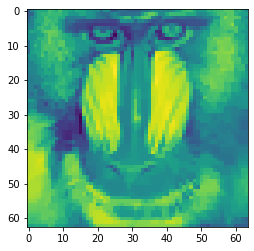

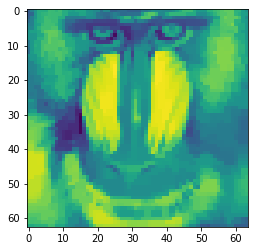

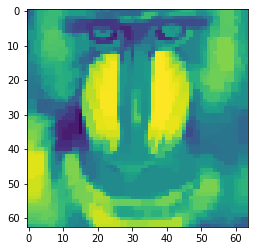

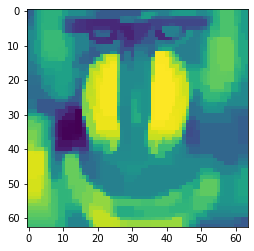

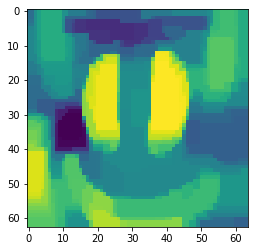

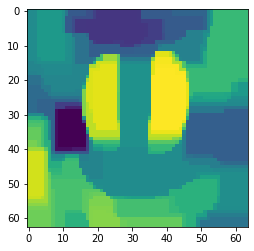

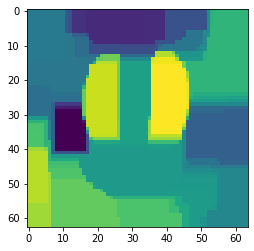

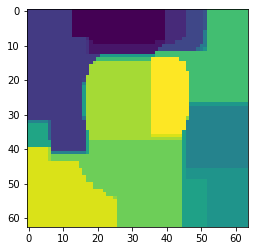

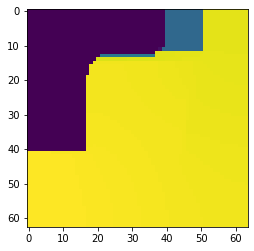

In [4]:
K = [10**(-0.25*i) for i in range(8,-1,-1)]
for i in K:
    opt,opt_val = lasso_2d(img,p=1,lambda_=i)
    print('lambda:{},opt_val:{}'.format(i,opt_val))
    plt.figure();plt.imshow(opt)

lambda:0.01,opt_val:2.841070868097896
lambda:0.01778279410038923,opt_val:4.5833123259118995
lambda:0.03162277660168379,opt_val:7.102859115211825
lambda:0.05623413251903491,opt_val:10.5717308541384
lambda:0.1,opt_val:15.066961172793997
lambda:0.1778279410038923,opt_val:20.707935427594393
lambda:0.31622776601683794,opt_val:27.35934450389688
lambda:0.5623413251903491,opt_val:33.49216833183711
lambda:1.0,opt_val:36.2367480147601


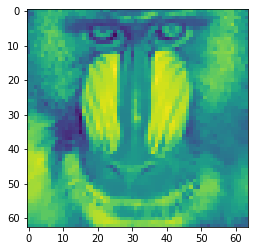

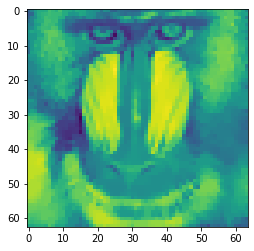

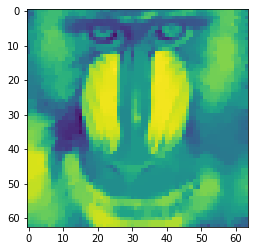

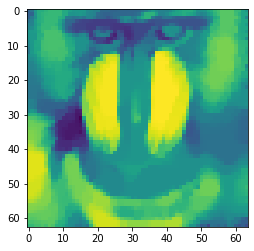

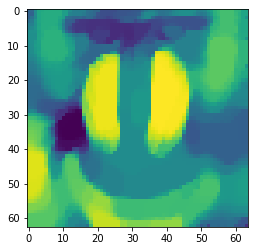

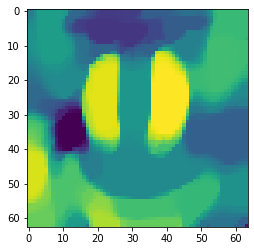

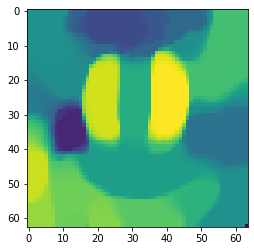

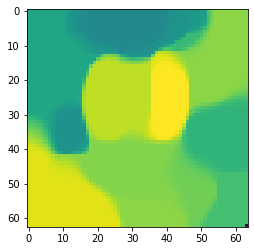

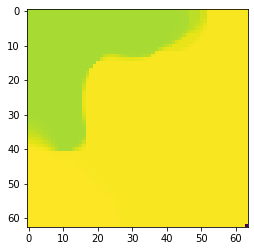

In [5]:
K = [10**(-0.25*i) for i in range(8,-1,-1)]
for i in K:
    opt,opt_val = lasso_2d(img,p=2,lambda_=i)
    print('lambda:{},opt_val:{}'.format(i,opt_val))
    plt.figure();plt.imshow(opt)

## anisotropic
lambda:0.01,opt_val:3.3967061429548298 <br>
lambda:0.01778279410038923,opt_val:5.348722522068654<br>
lambda:0.03162277660168379,opt_val:8.090071117547325<br>
lambda:0.05623413251903491,opt_val:11.771569691708756<br>
lambda:0.1,opt_val:16.460864840271082<br>
lambda:0.1778279410038923,opt_val:22.332351003375056<br>
lambda:0.31622776601683794,opt_val:28.95388320647669<br>
lambda:0.5623413251903491,opt_val:34.536987149947336<br>
lambda:1.0,opt_val:36.42759128345316


## isotropic
lambda:0.01,opt_val:2.841070868097896<br>
lambda:0.01778279410038923,opt_val:4.5833123259118995<br>
lambda:0.03162277660168379,opt_val:7.102859115211825<br>
lambda:0.05623413251903491,opt_val:10.5717308541384<br>
lambda:0.1,opt_val:15.066961172793997<br>
lambda:0.1778279410038923,opt_val:20.707935427594393<br>
lambda:0.31622776601683794,opt_val:27.35934450389688<br>
lambda:0.5623413251903491,opt_val:33.49216833183711<br>
lambda:1.0,opt_val:36.2367480147601<br>